In [79]:
import pandas as pd
import matplotlib as plt

In [80]:
df=pd.read_csv("npr.csv")

In [81]:
df.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [84]:
#Lower-Case Conversion
for index,row in df.iterrows():
    row['Article']=row['Article'].lower()

In [85]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [86]:
#Lemmatization
df["Article"] =df["Article"].apply(lambda x: ' '.join([lemmatizer.lemmatize(i) for i in x.split()]))

In [87]:
df['Article'].head()

0    in the washington of 2016, even when the polic...
1    donald trump ha used twitter — his preferred m...
2    donald trump is unabashedly praising russian p...
3    updated at 2:50 p. m. et, russian president vl...
4    from photography, illustration and video, to d...
Name: Article, dtype: object

In [88]:
docmat = cv.fit_transform(df['Article'])

In [89]:
docmat


<11992x53077 sparse matrix of type '<class 'numpy.int64'>'
	with 2997512 stored elements in Compressed Sparse Row format>

In [90]:
from  gensim.models.ldamodel import LdaModel

In [91]:
from gensim.models import CoherenceModel

In [92]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf

In [93]:
def process_text(text):
    text=[i.lower() for i in text]
    return text

In [94]:
df['processed_text']=df['Article'].apply(process_text)

In [95]:
dictionary=Dictionary(df['processed_text'])

In [97]:
dictionary.filter_extremes(no_below=2,no_above=0.95)

In [98]:
corpus=[dictionary.doc2bow(text) for text in df['processed_text']]

In [99]:
corpus

[[(0, 1),
  (1, 4),
  (2, 4),
  (3, 3),
  (4, 5),
  (5, 3),
  (6, 2),
  (7, 2),
  (8, 3),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 3),
  (15, 9),
  (16, 1),
  (17, 4)],
 [(15, 1), (16, 4), (17, 7)],
 [(3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (11, 1),
  (14, 1),
  (15, 3),
  (16, 6),
  (17, 4)],
 [(3, 1), (5, 1), (6, 2), (7, 3), (11, 1), (15, 5), (16, 2), (17, 4)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 22),
  (4, 13),
  (5, 11),
  (6, 1),
  (7, 4),
  (8, 8),
  (10, 1),
  (11, 11),
  (14, 6),
  (15, 20),
  (16, 11),
  (17, 14),
  (18, 2),
  (19, 3),
  (20, 2),
  (21, 7),
  (22, 1)],
 [(1, 1),
  (2, 1),
  (4, 1),
  (7, 1),
  (11, 3),
  (14, 3),
  (15, 4),
  (16, 1),
  (17, 2),
  (21, 1),
  (23, 7)],
 [(3, 9),
  (4, 5),
  (5, 9),
  (6, 1),
  (7, 4),
  (8, 1),
  (10, 1),
  (11, 2),
  (15, 15),
  (16, 8),
  (17, 9),
  (18, 1),
  (24, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 3),
  (4, 1),
  (5, 1),
  (6, 1),
  (11, 5),
  (14, 2),
  (15, 6),
  (16, 5),
  (17, 7),
  (

In [100]:
import matplotlib.pyplot as plt


In [101]:
coherence_scores=[]
for num in range(2,25,2):
    nmf=Nmf(corpus=corpus,
           num_topics=num,
           id2word=dictionary,
           passes=3,
           random_state=42)
    cm=CoherenceModel(model=nmf,
                     texts=df['processed_text'],
                     dictionary=dictionary,
                     coherence='c_v')
    coherence_scores.append(round(cm.get_coherence(),5))
    print(num)

2
4
6
8
10
12
14
16
18
20
22
24


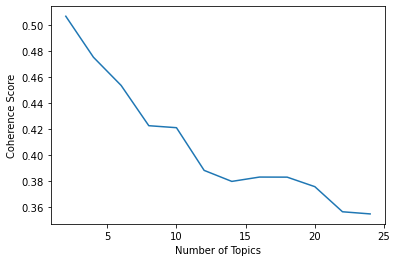

In [102]:
topic_nums=[2,4,6,8,10,12,14,16,18,20,22,24]
scores=list(zip(topic_nums,coherence_scores))
plt.plot(topic_nums,coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [103]:
lda_coherence=[]
for num_lda in range(2,25,2):
    lda=LdaModel(corpus,num_topics=num_lda,id2word=dictionary,passes=5,random_state=42)
    cmlda=CoherenceModel(model=lda,
                     texts=df['processed_text'],
                     dictionary=dictionary,
                     coherence='c_v')
    lda_coherence.append(round(cmlda.get_coherence(),5))
    print(num)
    

24
24
24
24
24
24
24
24
24
24
24
24


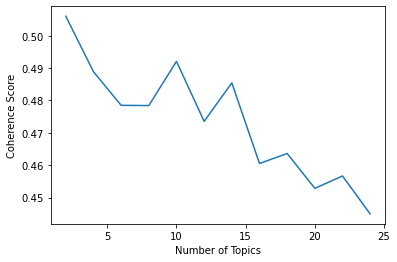

In [104]:
topic_lda=[2,4,6,8,10,12,14,16,18,20,22,24]
scores=list(zip(topic_nums,lda_coherence))
plt.plot(topic_lda,lda_coherence)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [105]:
from sklearn.decomposition import LatentDirichletAllocation

In [151]:
LDA = LatentDirichletAllocation(n_components=10,random_state=42)

In [152]:
LDA.fit(docmat)

LatentDirichletAllocation(random_state=42)

In [153]:
len(cv.get_feature_names())

53077

In [154]:
import random

In [155]:
for i in range(10):
    random_word_id = random.randint(0,53077)
    print(cv.get_feature_names()[random_word_id])

stamped
budged
explanations
printout
charlatan
aza
victorious
reorganizing
kumquat
mazzant


In [156]:
len(LDA.components_)

10

In [157]:
LDA.components_

array([[5.75691732e-01, 3.80161269e+02, 1.00001797e-01, ...,
        1.00268842e-01, 1.00015747e-01, 1.00000000e-01],
       [2.54457993e+01, 6.99968682e+02, 1.00000000e-01, ...,
        1.00001735e-01, 1.00000000e-01, 1.00001361e-01],
       [1.09893987e-01, 9.26715255e+02, 1.00002156e-01, ...,
        1.00013420e-01, 9.54096111e-01, 1.00001245e-01],
       ...,
       [2.62342796e+01, 5.13798422e+01, 3.09999304e+00, ...,
        1.00045153e-01, 1.24584899e+00, 2.09999442e+00],
       [5.84575595e+00, 1.30809765e+03, 1.00002055e-01, ...,
        1.00015782e-01, 1.00002628e-01, 1.00000000e-01],
       [1.23407982e-01, 6.77708535e+02, 1.00000952e-01, ...,
        1.00000000e-01, 1.00010434e-01, 1.00000000e-01]])

In [158]:
LDA.components_.shape

(10, 53077)

In [159]:
single_topic = LDA.components_[0]

In [160]:
single_topic.argsort()

array([25734, 19435, 38444, ..., 41706, 41698, 18709])

In [161]:
top_ten_indices=single_topic.argsort()[-10:]

In [162]:
for index in top_ten_indices:
    print(cv.get_feature_names()[index])

make
just
wa
people
ha
like
water
says
say
food


In [163]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['farm', 'eat', 'animal', 'year', 'new', 'make', 'just', 'wa', 'people', 'ha', 'like', 'water', 'says', 'say', 'food']


THE TOP 15 WORDS FOR TOPIC #1
['group', 'force', 'report', 'military', 'according', 'told', 'killed', 'city', 'say', 'ha', 'attack', 'police', 'people', 'said', 'wa']


THE TOP 15 WORDS FOR TOPIC #2
['trade', 'time', 'team', 'american', 'north', 'million', 'said', 'new', 'country', 'say', 'wa', 'world', 'china', 'year', 'ha']


THE TOP 15 WORDS FOR TOPIC #3
['judge', 'government', 'right', 'justice', 'federal', 'police', 'people', 'case', 'say', 'ha', 'state', 'wa', 'said', 'law', 'court']


THE TOP 15 WORDS FOR TOPIC #4
['life', 'day', 'ha', 'child', 'time', 'just', 'student', 'like', 'year', 'people', 'family', 'school', 'says', 'say', 'wa']


THE TOP 15 WORDS FOR TOPIC #5
['official', 'department', 'state', 'russian', 'administration', 'security', 'government', 'russia', 'house', 'say', 'president', 'ha', 'said', 'wa', 'trump']


THE 

In [164]:
df=df.drop(['processed_text'],axis=1)

In [167]:
topic_results = LDA.transform(docmat)

In [168]:
topic_results.shape

(11992, 10)

In [169]:
topic_results[0]

array([1.52238603e-04, 1.52249225e-04, 1.52255073e-04, 1.52239638e-04,
       1.52246938e-04, 7.10662994e-01, 2.88119036e-01, 1.52250639e-04,
       1.52245221e-04, 1.52244680e-04])

In [170]:
topic_results[0].argmax()

5

In [171]:
df['Topic'] = topic_results.argmax(axis=1)

In [172]:
df.head(10)

,Article,Topic
0,"in the washington of 2016, even when the polic...",5
1,donald trump ha used twitter — his preferred m...,5
2,donald trump is unabashedly praising russian p...,5
3,"updated at 2:50 p. m. et, russian president vl...",5
4,"from photography, illustration and video, to d...",2
5,i did not want to join yoga class. i hated tho...,9
6,with a who ha publicly supported the debunked ...,9
7,"i wa standing by the airport exit, debating wh...",4
8,"if movie were trying to be more realistic, per...",0
9,"eighteen year ago, on new year’s eve, david fi...",0


In [173]:
#NOW LETS APPLY NMF FOR DOCUMENT CLUSTERING
npr = pd.read_csv('npr.csv')

In [127]:
npr.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [206]:
for index,row in npr.iterrows():
    row['Article']=row['Article'].lower()

In [185]:
npr["Article"] =npr["Article"].apply(lambda x: ' '.join([lemmatizer.lemmatize(i) for i in x.split()]))

In [130]:
npr['Article'].head()

0    in the washington of 2016, even when the polic...
1      donald trump has used twitter  —   his prefe...
2      donald trump is unabashedly praising russian...
3    updated at 2:50 p. m. et, russian president vl...
4    from photography, illustration and video, to d...
Name: Article, dtype: object

In [186]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [187]:
dtm = tfidf.fit_transform(npr['Article'])

In [188]:
dtm

<11992x53334 sparse matrix of type '<class 'numpy.float64'>'
	with 3003305 stored elements in Compressed Sparse Row format>

In [189]:
nmf_model = NMF(n_components=10,random_state=42)

In [190]:
nmf_model.fit(dtm)

NMF(n_components=10, random_state=42)

In [191]:
len(tfidf.get_feature_names())

53334

In [192]:
len(nmf_model.components_)

10

In [193]:
nmf_model.components_

array([[5.16097950e-03, 8.07750486e-02, 0.00000000e+00, ...,
        1.84424756e-03, 9.73904873e-04, 0.00000000e+00],
       [0.00000000e+00, 4.69957177e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.44433484e-01, 1.44475580e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 5.61541503e-02, 0.00000000e+00, ...,
        0.00000000e+00, 2.31843383e-05, 0.00000000e+00],
       [6.74872358e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [194]:
len(nmf_model.components_[0])

53334

In [195]:
single_topic_nmf = nmf_model.components_[0]

In [196]:
single_topic_nmf.argsort()[-10:]

array([47866, 38840, 26739, 47868, 26063, 41894, 35368, 27926, 41902,
       51435])

In [198]:
top_word_indices_nmf = single_topic_nmf.argsort()[-10:]

In [199]:
for index in top_word_indices_nmf:
    print(tfidf.get_feature_names()[index])

thing
really
know
think
just
say
people
like
says
wa


In [200]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['don', 'way', 'woman', 'time', 'life', 'thing', 'really', 'know', 'think', 'just', 'say', 'people', 'like', 'says', 'wa']


THE TOP 15 WORDS FOR TOPIC #1
['wa', 'business', 'gop', 'administration', 'presidential', 'obama', 'house', 'white', 'republican', 'ha', 'campaign', 'donald', 'said', 'president', 'trump']


THE TOP 15 WORDS FOR TOPIC #2
['republicans', 'act', 'cost', 'patient', 'percent', 'affordable', 'people', 'obamacare', 'tax', 'plan', 'coverage', 'medicaid', 'insurance', 'care', 'health']


THE TOP 15 WORDS FOR TOPIC #3
['people', 'syrian', 'military', 'killed', 'say', 'force', 'ha', 'syria', 'officer', 'wa', 'city', 'isis', 'attack', 'said', 'police']


THE TOP 15 WORDS FOR TOPIC #4
['percent', 'election', 'win', 'primary', 'delegate', 'party', 'candidate', 'hillary', 'democratic', 'vote', 'state', 'voter', 'campaign', 'sanders', 'clinton']


THE TOP 15 WORDS FOR TOPIC #5
['jazz', 'prince', 'musician', 'audio', 'singer', 'record', 'guitar', 'd

In [201]:
topic_results_nmf = nmf_model.transform(dtm)

In [202]:
topic_results_nmf.shape

(11992, 10)

In [203]:
topic_results_nmf[0].argmax()

8

In [148]:
npr.head(10)

,Article
0,"in the washington of 2016, even when the polic..."
1,donald trump has used twitter — his prefe...
2,donald trump is unabashedly praising russian...
3,"updated at 2:50 p. m. et, russian president vl..."
4,"from photography, illustration and video, to d..."
5,i did not want to join yoga class. i hated tho...
6,with a who has publicly supported the debunk...
7,"i was standing by the airport exit, debating w..."
8,"if movies were trying to be more realistic, pe..."
9,"eighteen years ago, on new year’s eve, david f..."


In [204]:
npr['Topic'] = topic_results_nmf.argmax(axis=1)

In [208]:
npr.head(10)

,Article,Topic
0,"In the Washington of 2016, even when the polic...",8
1,Donald Trump ha used Twitter — his preferred m...,1
2,Donald Trump is unabashedly praising Russian P...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",8
4,"From photography, illustration and video, to d...",3
5,I did not want to join yoga class. I hated tho...,0
6,With a who ha publicly supported the debunked ...,7
7,"I wa standing by the airport exit, debating wh...",0
8,"If movie were trying to be more realistic, per...",0
9,"Eighteen year ago, on New Year’s Eve, David Fi...",0
